In [1]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('IoTData.csv')
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [ ]:
dataset.head()

,Temperatura,Humedad,Nivel_agua,Nitrogeno,Fosforo,Potasio,Actuator_Bomba_Agua_Encendido
0,41,63,100,255,255,255,0
1,41,59,100,255,255,255,0
2,41,62,100,255,255,255,0
3,40,60,100,255,255,255,0
4,39,61,100,255,255,255,0


In [3]:
#X
#y
dataset.describe(include='all')

,Temperatura,Humedad,Nivel_agua,Nitrogeno,Fosforo,Potasio,Actuator_Bomba_Agua_Encendido
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,33.441000,50.674000,70.423000,236.545000,238.282000,231.096000,0.295000
std,1.335778,24.089209,43.887768,32.361787,29.295609,41.875295,0.456271
min,32.000000,0.000000,0.000000,178.000000,186.000000,157.000000,0.000000
25%,32.750000,50.000000,0.000000,255.000000,255.000000,255.000000,0.000000
50%,33.000000,60.000000,100.000000,255.000000,255.000000,255.000000,0.000000
75%,34.000000,65.000000,100.000000,255.000000,255.000000,255.000000,1.000000
max,41.000000,100.000000,100.000000,255.000000,255.000000,255.000000,1.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Temperatura                    1000 non-null   int64
 1   Humedad                        1000 non-null   int64
 2   Nivel_agua                     1000 non-null   int64
 3   Nitrogeno                      1000 non-null   int64
 4   Fosforo                        1000 non-null   int64
 5   Potasio                        1000 non-null   int64
 6   Actuator_Bomba_Agua_Encendido  1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


Comprabacion de valores No Nulos

In [5]:
dataset.isnull().sum()

Temperatura                      0
Humedad                          0
Nivel_agua                       0
Nitrogeno                        0
Fosforo                          0
Potasio                          0
Actuator_Bomba_Agua_Encendido    0
dtype: int64

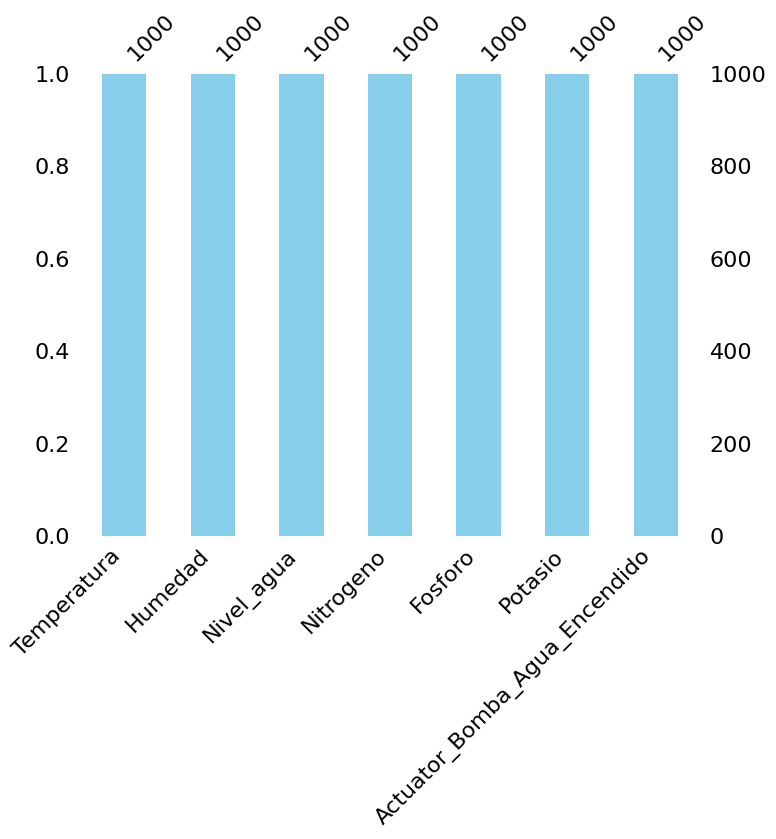

In [6]:
import missingno as msno
msno.bar(dataset,figsize=(8,6),color='skyblue')
plt.show()

Visualizacion de Datos


Un diagrama de dispersión es una visualización de datos bidimensional que utiliza puntos para representar los valores obtenidos para dos variables diferentes: una trazada a lo largo del eje x y la otra a lo largo del eje y. Podemos trazar el diagrama de dispersión entre dos características cualesquiera. Estamos tomando un ejemplo de Humedad y Nivel de Agua del Suelo.

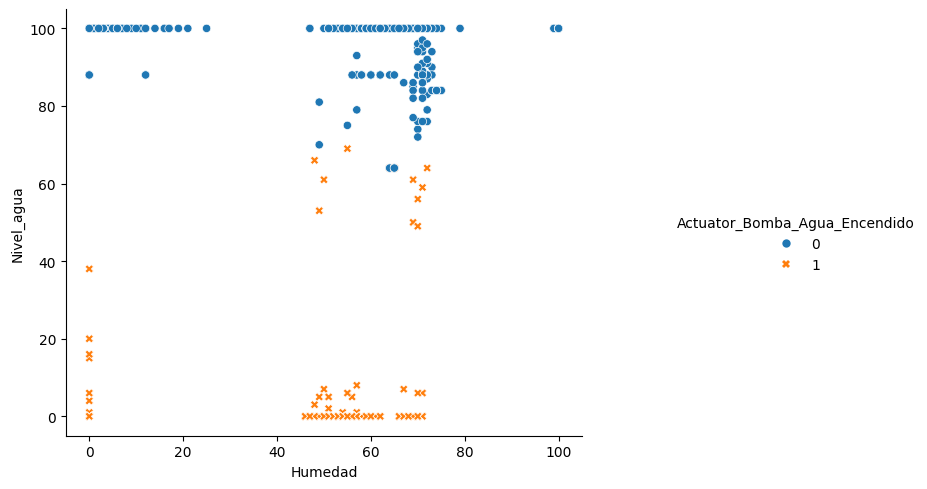

In [7]:
g=sns.relplot(x='Humedad',y='Nivel_agua',data=dataset,hue='Actuator_Bomba_Agua_Encendido',style='Actuator_Bomba_Agua_Encendido')
g.fig.set_size_inches(10,5)
plt.show()

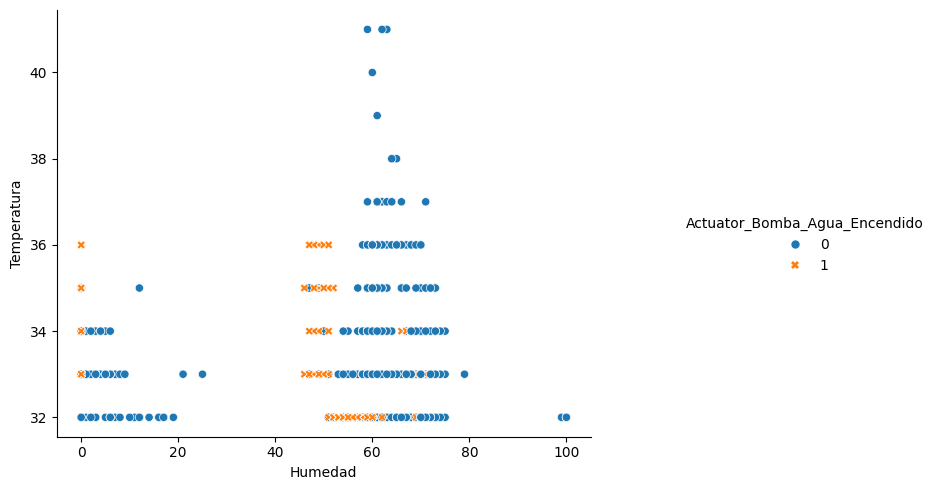

In [8]:
g=sns.relplot(x='Humedad',y='Temperatura',data=dataset,hue='Actuator_Bomba_Agua_Encendido',style='Actuator_Bomba_Agua_Encendido')
g.fig.set_size_inches(10,5)
plt.show()

Como podemos ver, las características del nivel de agua y humedad ofrecen una mejor división de los grupos en comparación con las características temperatura y humedad. Esto indica que las primeras dos (nivel de agua y humedad) pueden ayudar a realizar predicciones mejores y más precisas para la activacion de la bomba de agua.

Vista General: Matriz de los diagramas de Dispersion de las variables

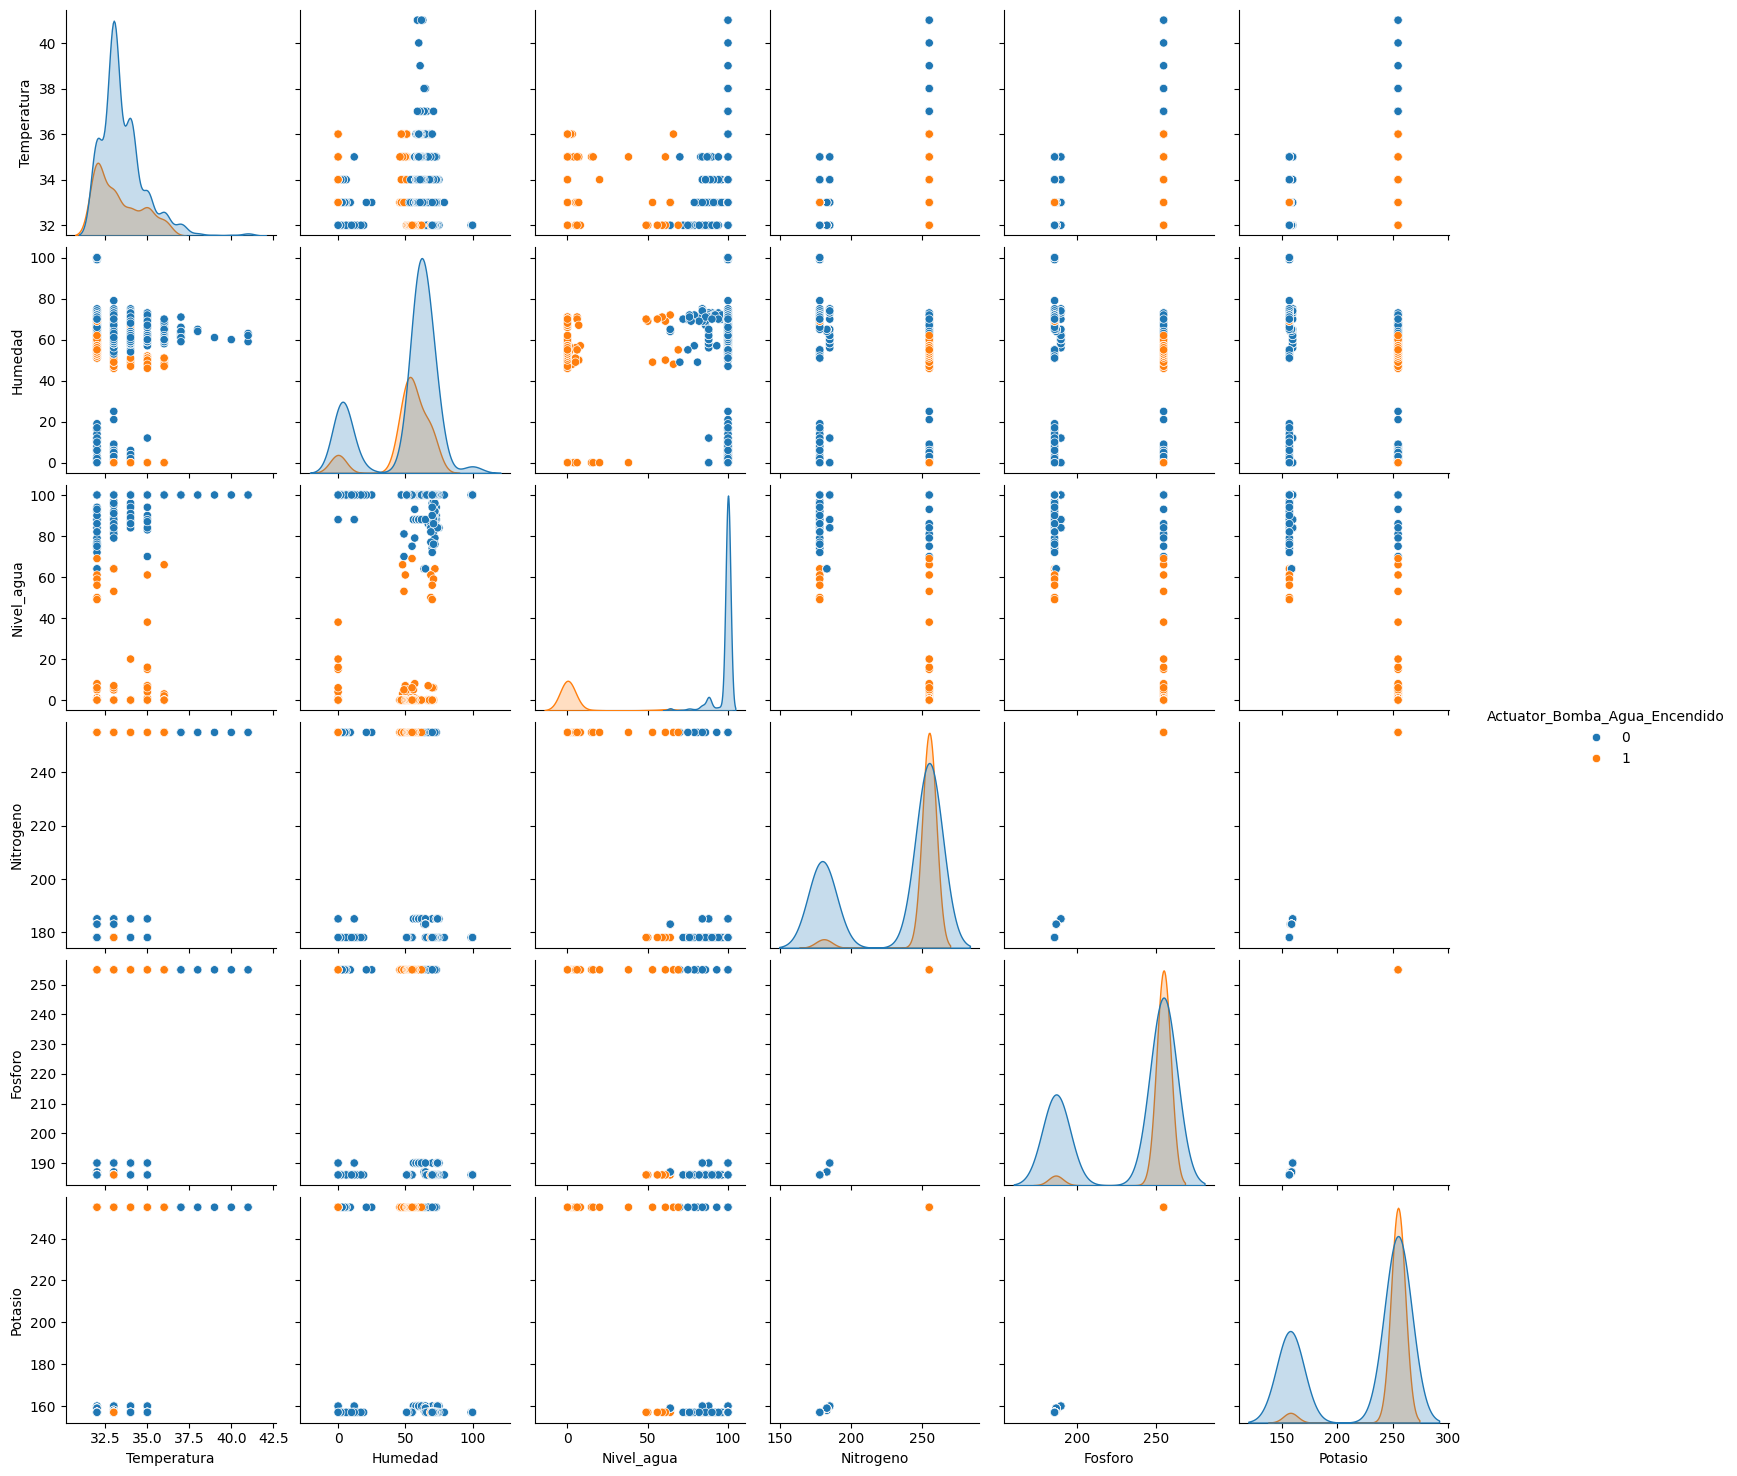

In [9]:
sns.pairplot(dataset,hue="Actuator_Bomba_Agua_Encendido")
plt.show()

a partir del gráfico podemos ver el diagrama de dispersión entre dos características cualesquiera y las distribuciones.

# Division de Datos  - Entrenamiento - Pruebas

In [ ]:
#dividir datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
#since Y is categorical
#labeling first
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
Label = LabelEncoder()
Y_train = Label.fit_transform(Y_train)
Y_test = Label.transform(Y_test)

In [ ]:
Y_train

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
#Algoritmo de naive_bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
y_predict = nb.predict(X_test)

In [ ]:
y_predict

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0])

In [ ]:
Y_test

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0])

Matriz de Confusión

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,y_predict)
cm

array([[147,   0],
       [  4,  49]])

Precisión del Algoritmo

In [ ]:
accuracy_score(Y_test,y_predict)


0.98